# Title

**Exercise: Regression with Bagging**

# Description

The aim of this exercise is to understand bagging regression.

# Instructions:
- Read the dataset airquality.csv as a pandas dataframe.
- Take a quick look at the dataset.
- Split the data into train and test sets.
- Specify the number of bootstraps as 30 and a maximum depth of 3.
- Define a Bagging Regression model that uses Decision Tree as its base estimator.
- Fit the model on the train data.
- Use the helper code to predict using the mean model and individual estimators. The plot will look similar to the one given above.
- Predict on the test data using the first estimator and the mean model.
- Compute and display the test MSEs.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a> : Split arrays or matrices into random train and test subsets.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html" target="_blank">BaggingRegressor()</a> : Returns a Bagging regressor instance.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">DecisionTreeRegressor()</a> : A decision tree regressor.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">DecisionTreeRegressor().estimators_</a> : A list of estimators. Use this to access any of the estimators.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" target="_blank">sklearn.mean_squared_error()</a> : Mean squared error regression loss.

In [1]:
# Import necessary libraries

import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
# Read the dataset
df = pd.read_csv("airquality.csv",index_col=0)

In [6]:
# Take a quick look at the data
df.head(10)



,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
6,28.0,NaN,14.9,66,5,6
7,23.0,299.0,8.6,65,5,7
8,19.0,99.0,13.8,59,5,8
9,8.0,19.0,20.1,61,5,9
10,NaN,194.0,8.6,69,5,10


In [7]:
# We will only use Ozone for this exerice. Drop any notnas
df = df[df.Ozone.notna()]

In [8]:
# Assign "x" column as the predictor variable, only use Ozone, and "y" as the
x = df[['Ozone']].values
y = df['Temp']

In [16]:
# Split the data into train and test sets with train size as 0.8 and random_state as 102
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=102)

### Bagging Regressor

In [17]:

# Specify the number of bootstraps as 30
num_bootstraps = 30

# Specify the maximum depth of the decision tree as 3
max_depth = 3

# Define the Bagging Regressor Model
# Use Decision Tree as your base estimator (estimator = DecisionTreeRegressor(max_depth=max_depth) with depth as mentioned in max_depth
# Initialise number of estimators using the num_bootstraps value
model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=max_depth),
                         n_estimators=num_bootstraps, random_state=102)

# Fit the model on the train data
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                 n_estimators=30, random_state=102)

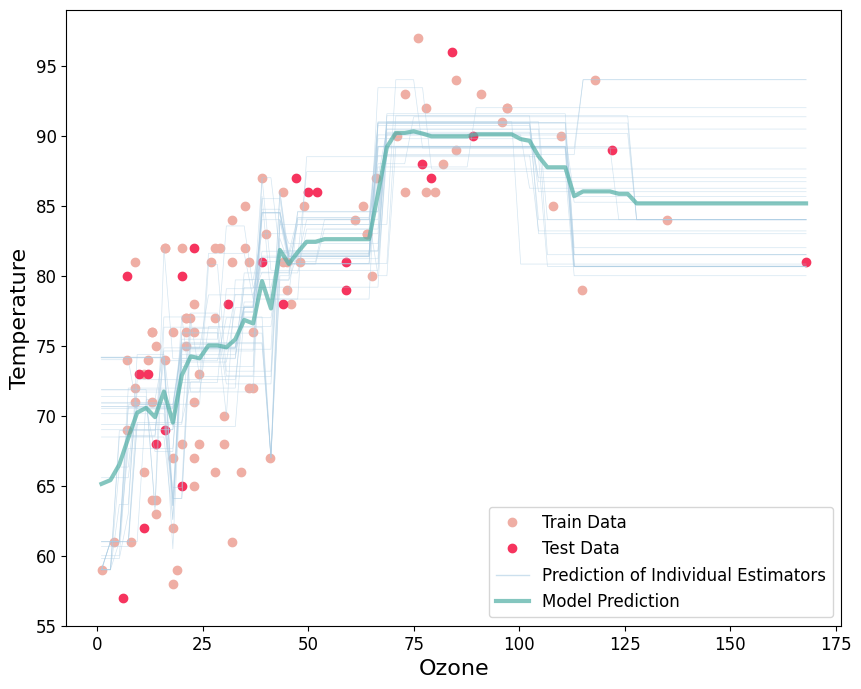

In [18]:
# Helper code to plot the predictions of individual estimators and
plt.figure(figsize=(10,8))

xrange = np.linspace(x.min(),x.max(),80).reshape(-1,1)
plt.plot(X_train,y_train,'o',color='#EFAEA4', markersize=6, label="Train Data")
plt.plot(X_test,y_test,'o',color='#F6345E', markersize=6, label="Test Data")

plt.xlim()
for i in model.estimators_:
    y_pred1 = i.predict(xrange)
    plt.plot(xrange,y_pred1,alpha=0.5,linewidth=0.5,color = '#ABCCE3')
plt.plot(xrange,y_pred1,alpha=0.6,linewidth=1,color = '#ABCCE3',label="Prediction of Individual Estimators")


y_pred = model.predict(xrange)
plt.plot(xrange,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='Model Prediction')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()

In [20]:
# Assuming 'model' is your BaggingRegressor object
# Select one of the individual estimators from the model
individual_estimator = model.estimators_[0]  # You can select any index from 0 to num_bootstraps-1

# Now use this individual estimator to make predictions on the test set
y_pred1 = individual_estimator.predict(X_test)

# Calculate and print the test MSE for this individual estimator
from sklearn.metrics import mean_squared_error
print("The test MSE of one estimator in the model is", round(mean_squared_error(y_test, y_pred1), 2))

The test MSE of one estimator in the model is 45.87


In [21]:
# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the test MSE for the overall model
from sklearn.metrics import mean_squared_error
print("The test MSE of the model is", round(mean_squared_error(y_test, y_pred), 2))

The test MSE of the model is 30.03


## Mindchow 🍲

After marking, go back and change the number of bootstraps and the maximum depth of the tree.


- Do you see any relation between them?

- How does the variance change with change in maximum depth?

- How does the variance change with change in number of bootstraps?

1. **Do you see any relation between the number of bootstraps and the maximum depth of the tree?**
   - Increasing the number of bootstraps generally leads to a reduction in variance because it averages more estimates, thereby stabilizing predictions regardless of the maximum depth. However, the maximum depth of each tree controls how specific each model gets to the training data. High depth in each tree can still result in high variance in each individual model but averaging across many models (high bootstraps) can mitigate this effect somewhat. Lower depth typically restricts the model's capacity to overfit, making each tree's prediction more biased but less varied.

2. **How does the variance change with change in maximum depth?**
   - As the maximum depth increases, the variance among individual models within the ensemble tends to increase. This is because deeper trees have a higher capacity to fit to noise in the training data rather than just the actual signal. If not controlled, this can lead to overfitting, where individual trees might exhibit high variance in their predictions. However, this high variance can be counteracted by the bagging process if combined with a sufficient number of bootstraps.

3. **How does the variance change with change in the number of bootstraps?**
   - Increasing the number of bootstraps typically reduces the variance of the predictions of the ensemble model. This effect comes from the law of large numbers in statistics, where averaging a larger number of independent estimates (in this case, predictions from different trees) tends to converge towards the expected value, leading to a more stable and reliable prediction. Thus, a higher number of bootstraps helps in smoothing out the predictions and reducing the impact of outliers or highly varied predictions from any single tree within the ensemble.
   